In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='whitegrid')
RANDOM_STATE = 42

In [3]:
data_path = '/content/mental_health_digital_behavior_data.csv'
df = pd.read_csv(data_path, encoding='utf-8-sig', delimiter=',')

print('Shape of the dataset:', df.shape)
df.info()
print(df.describe())

Shape of the dataset: (500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB
       daily_screen_time_min  num_app_switches  sleep_hours  \
count             500.000000        500.000000   500.000000   
mean              360.437800         49.840000     6.557400   
std                58.782476   

In [4]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

if missing_values.sum() > 0:
  df.fillna(df.mean(), inplace=True)
  print('Filled missing values with column means.')
else:
  print('No missing values detected.')

Missing values in each column:
daily_screen_time_min      0
num_app_switches           0
sleep_hours                0
notification_count         0
social_media_time_min      0
focus_score                0
mood_score                 0
anxiety_level              0
digital_wellbeing_score    0
dtype: int64
No missing values detected.


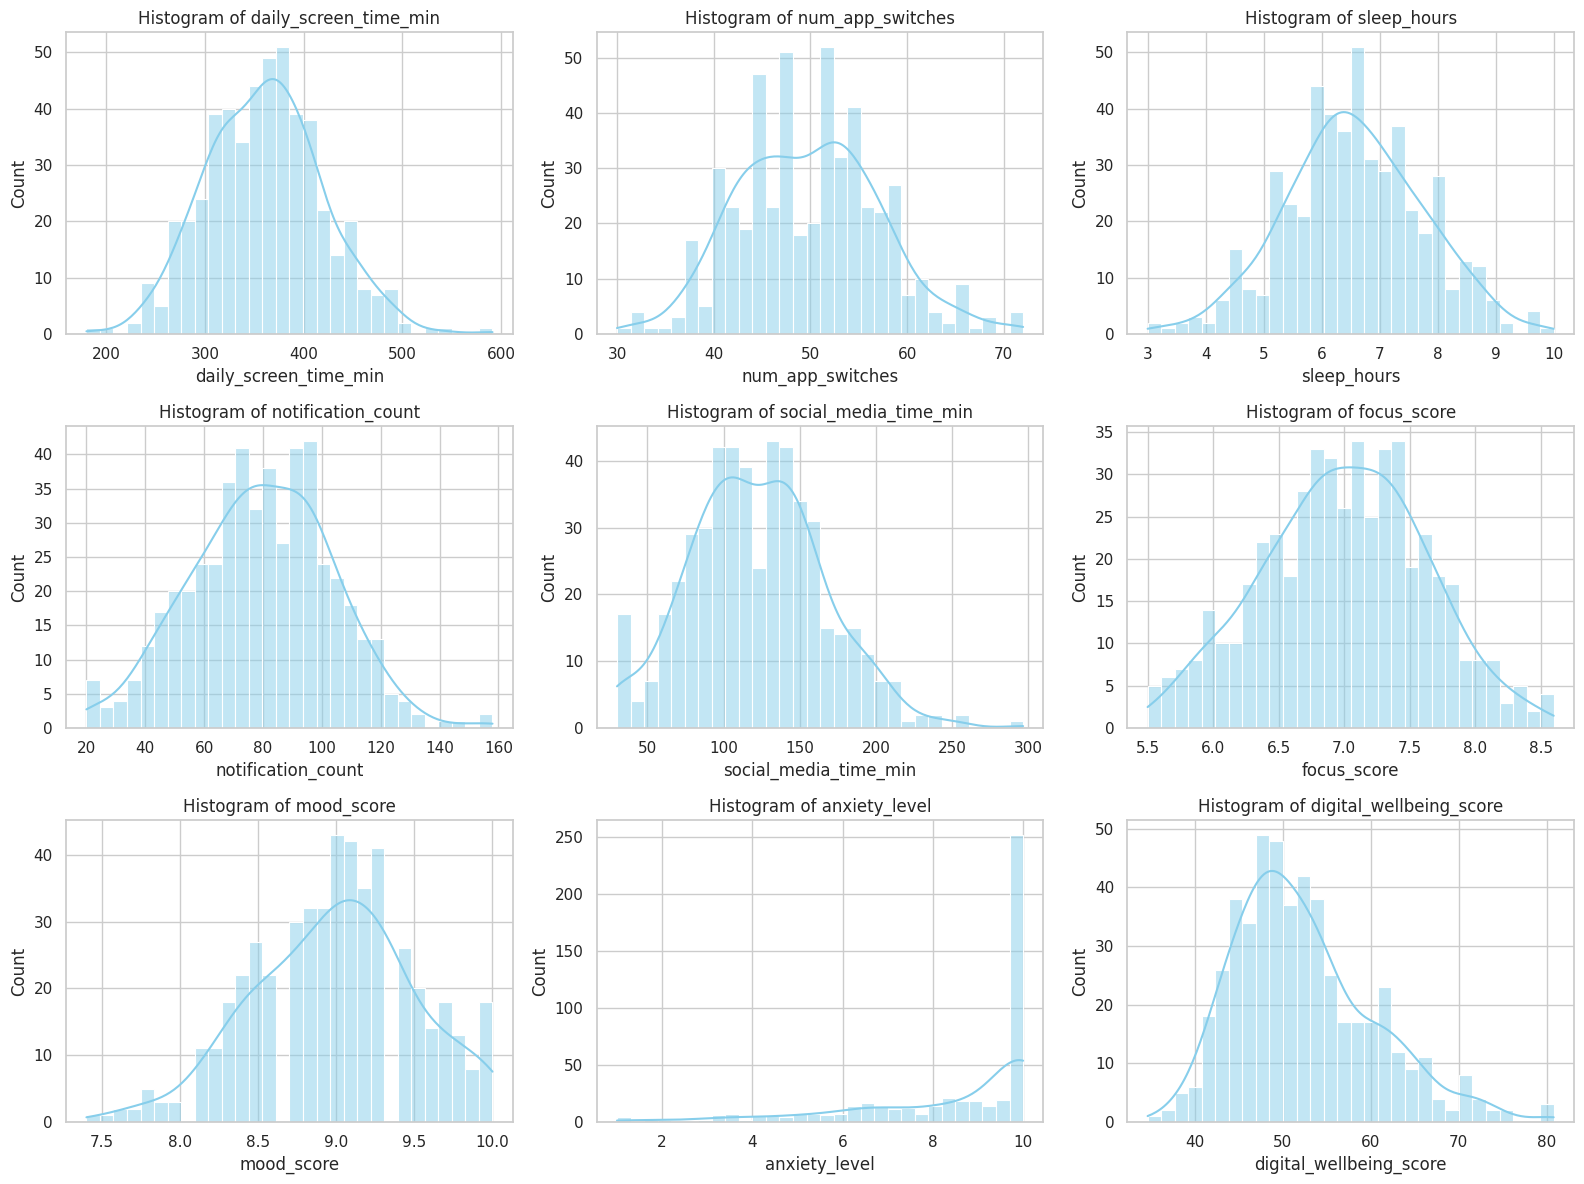

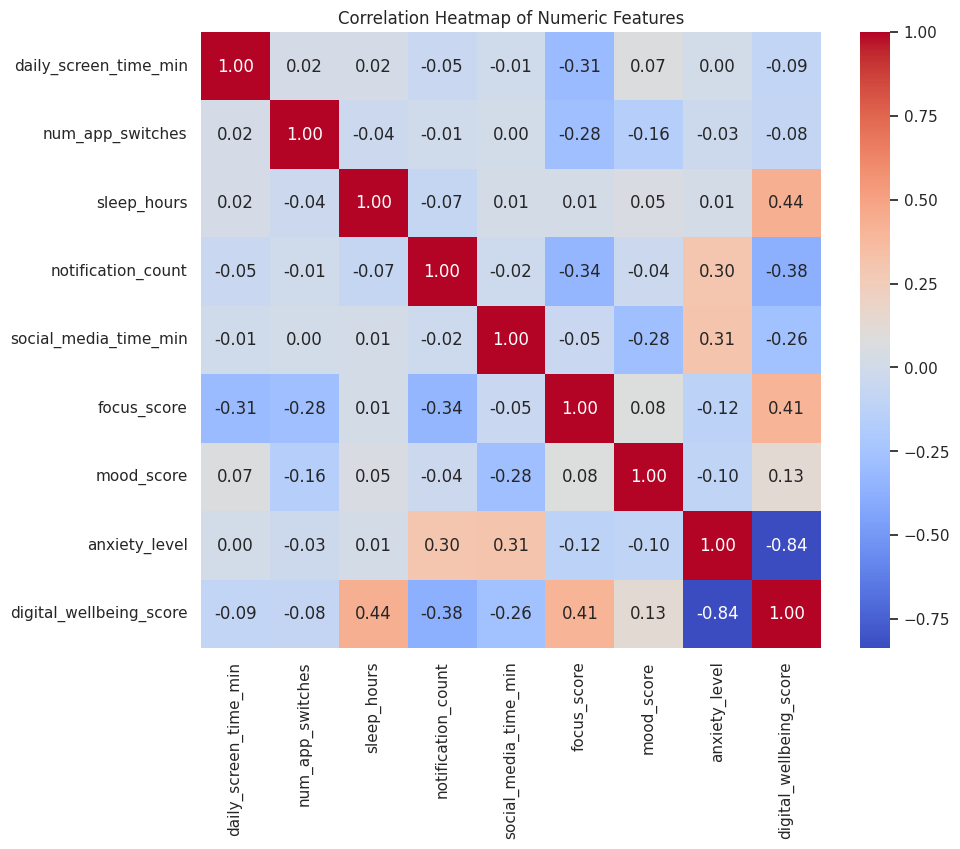

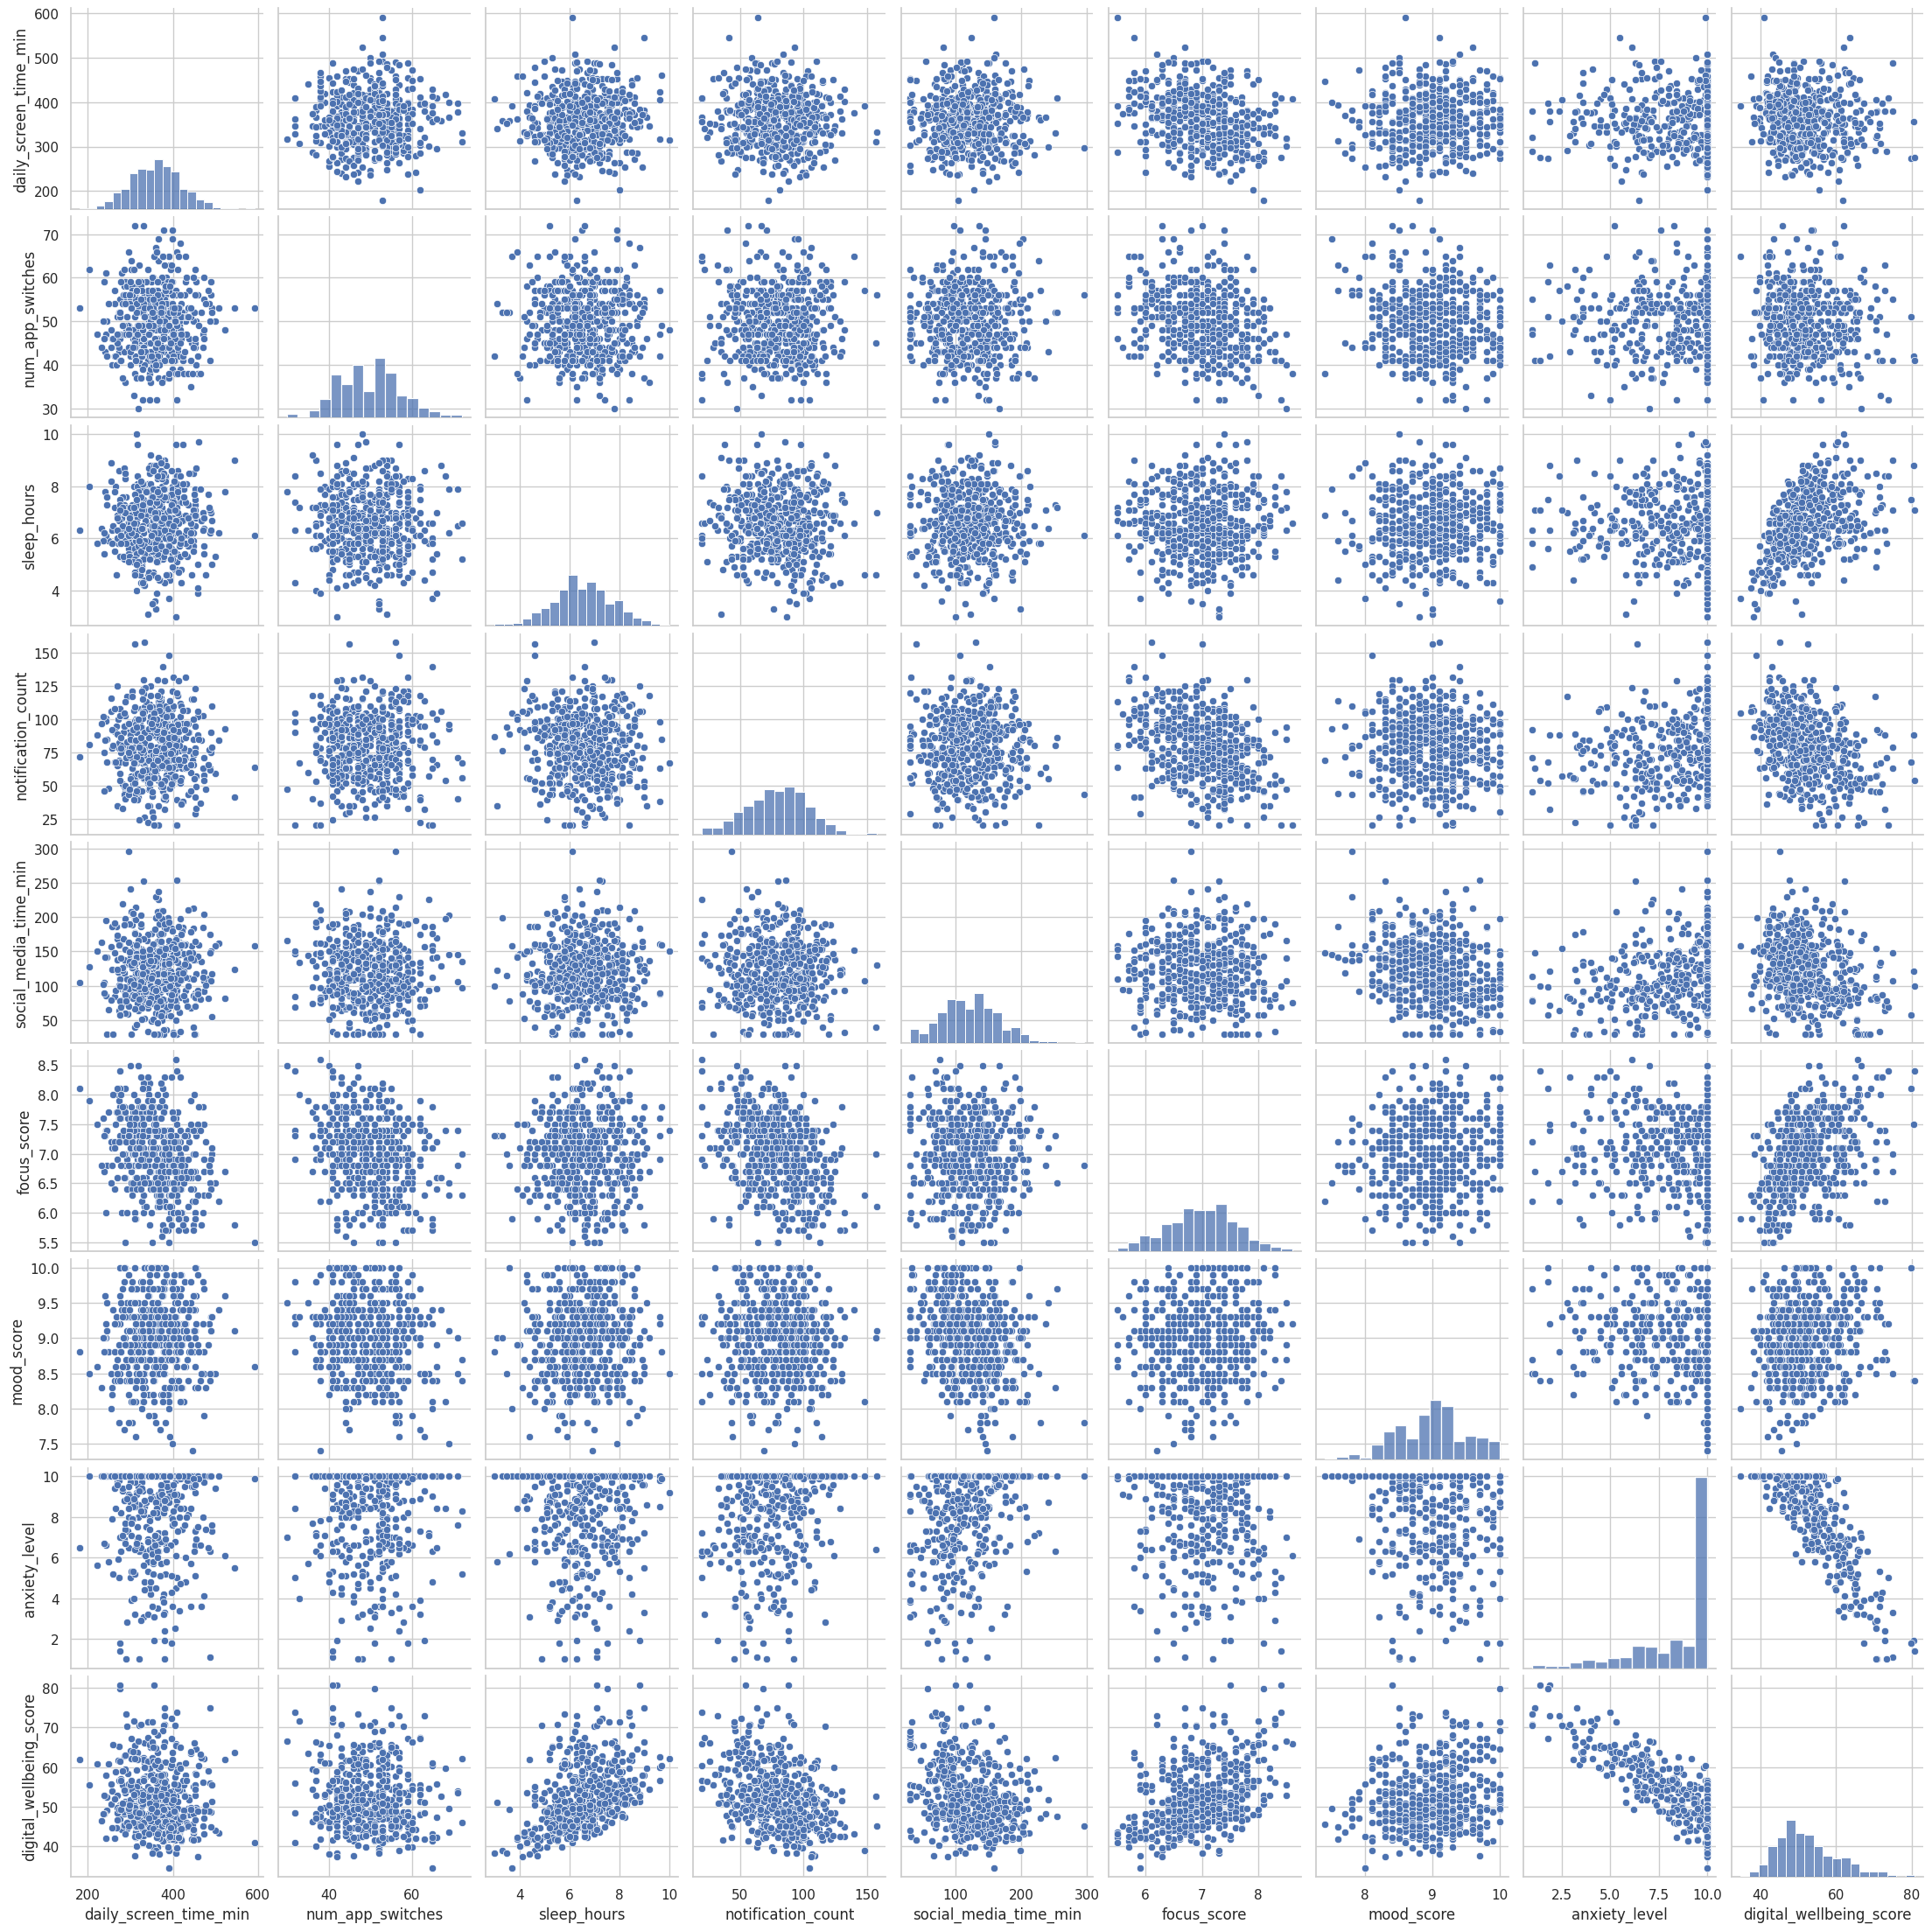

In [5]:
numeric_df = df.select_dtypes(include=[np.number])

numeric_columns = numeric_df.columns.tolist()

plt.figure(figsize=(16, 12))
for idx, col in enumerate(numeric_columns):
  plt.subplot(3, 3, idx+1)
  sns.histplot(numeric_df[col], kde=True, bins=30, color='skyblue')
  plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

if len(numeric_columns) >= 4:
  plt.figure(figsize=(10, 8))
  corr_matrix = numeric_df.corr()
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap of Numeric Features')
  plt.show()

sns.pairplot(numeric_df)
plt.show()

R2 Score for the Linear Regression model: 0.999


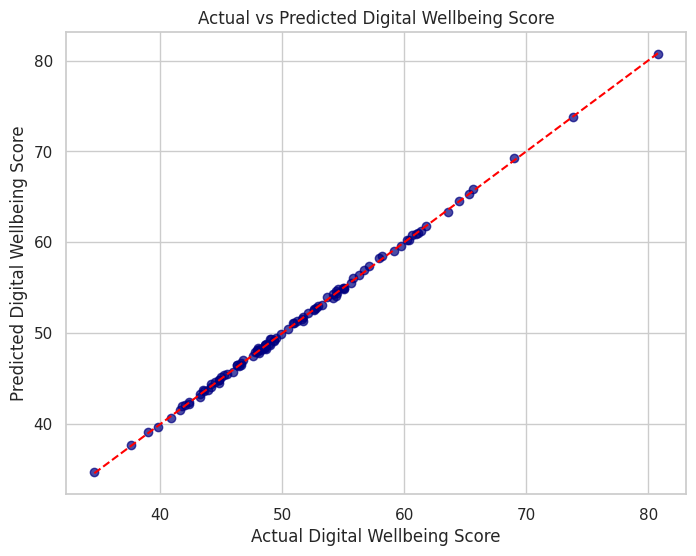

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = 'digital_wellbeing_score'
features = [col for col in numeric_df.columns if col != target]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score for the Linear Regression model: {r2:.3f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.xlabel('Actual Digital Wellbeing Score')
plt.ylabel('Predicted Digital Wellbeing Score')
plt.title('Actual vs Predicted Digital Wellbeing Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls='--', color='red')
plt.show()